In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from load_MNIST import MnistDataloader
from os.path import join
%matplotlib inline

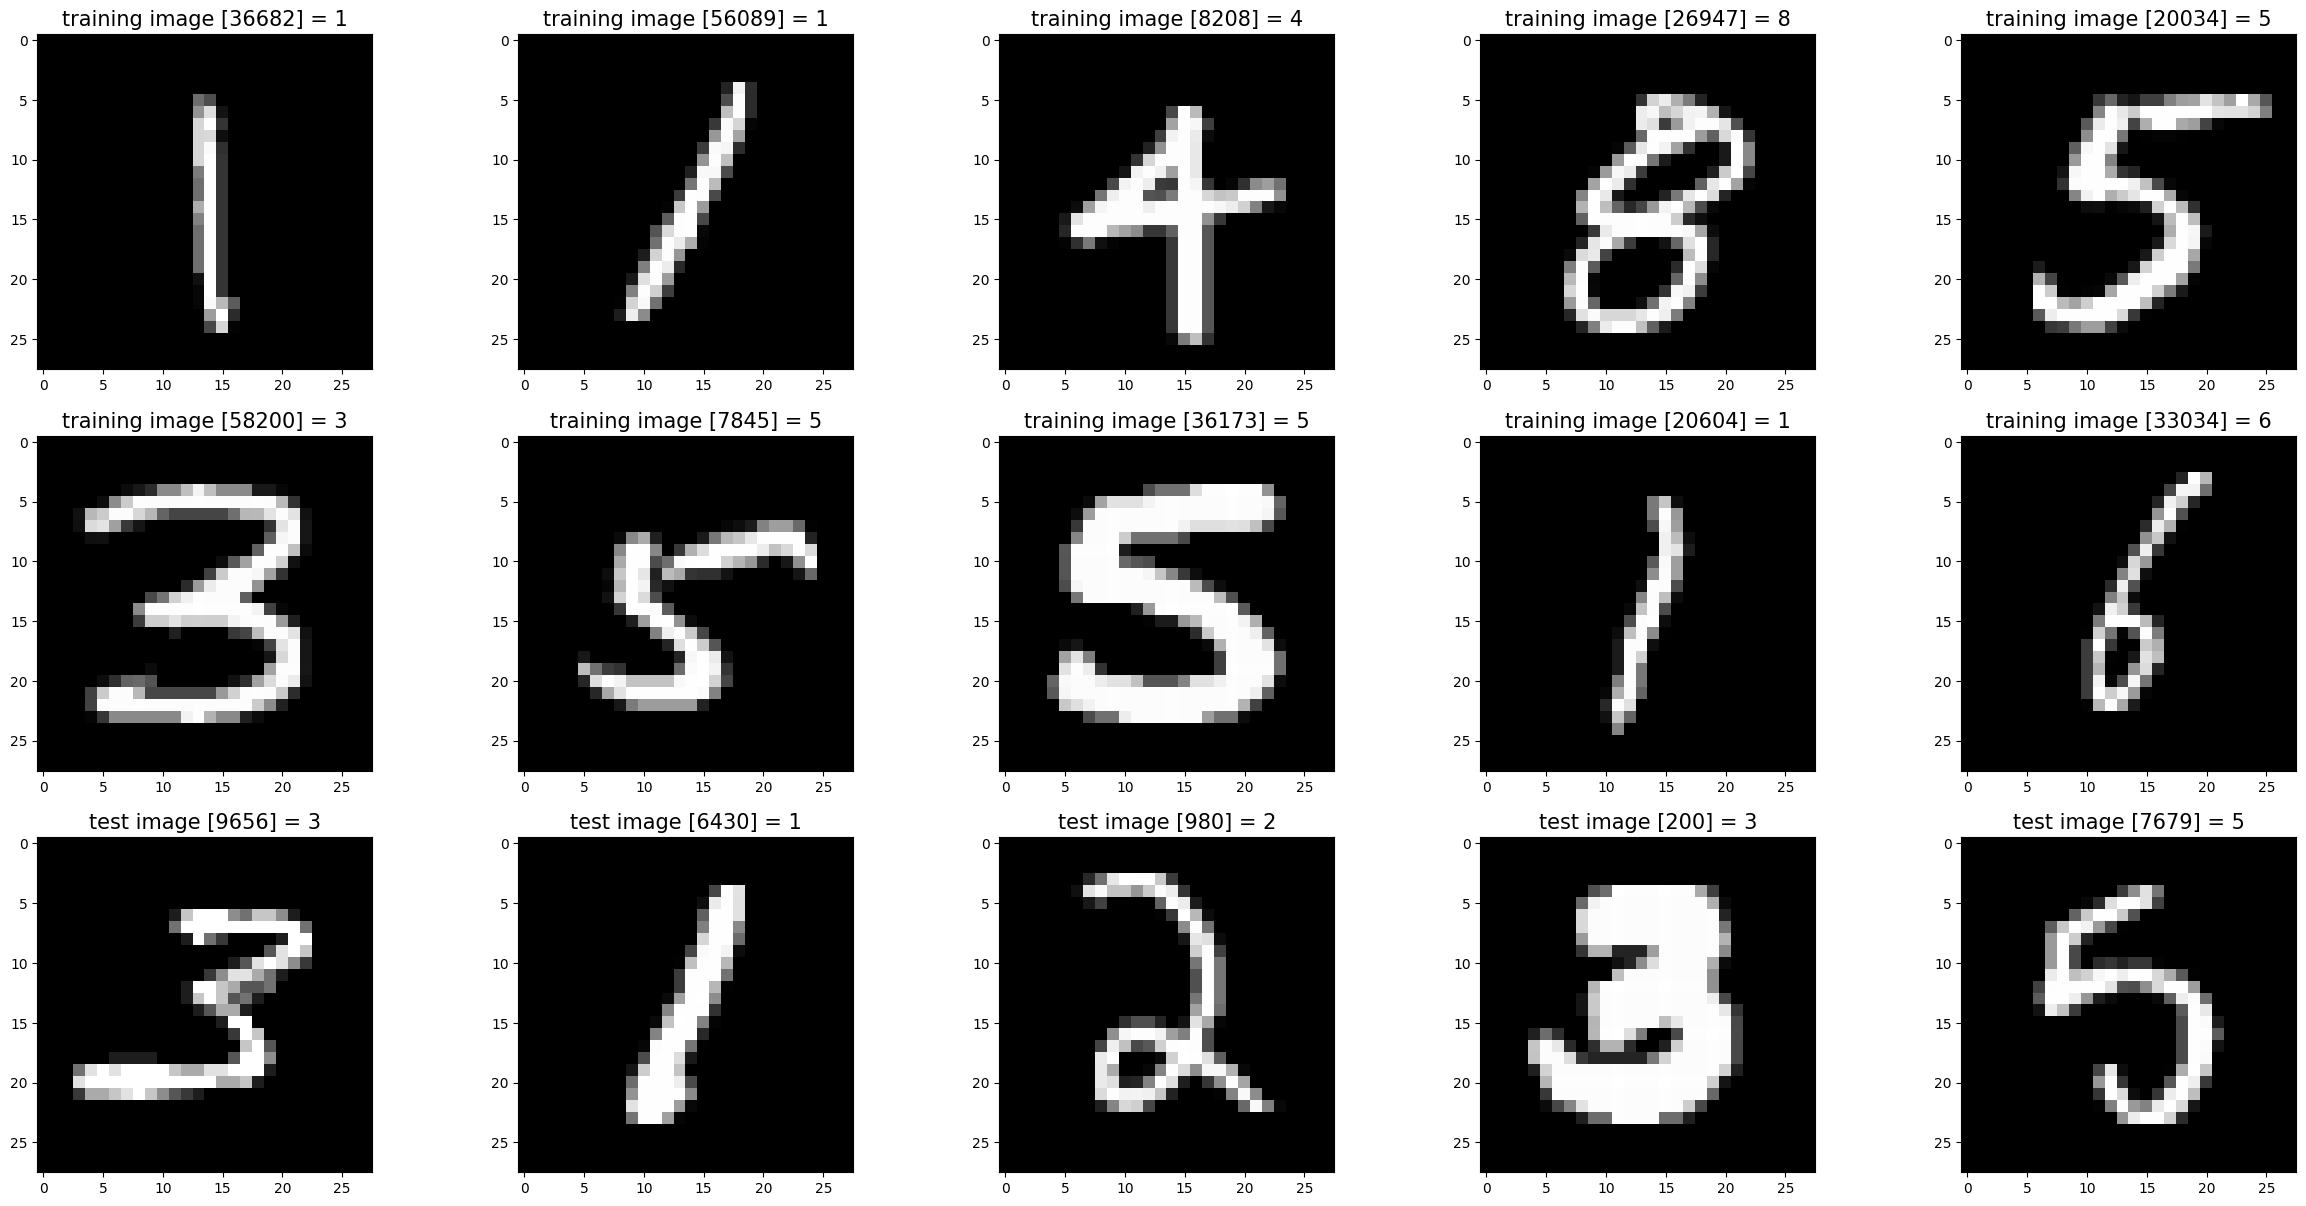

In [2]:
input_path = 'datasets/MNIST_dataset/'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)

In [3]:
m_train = len(x_train)
m_test = len(x_test)
num_pixel = len(x_train[0])

print(f"Number of training examples in training set : {m_train}")
print(f"Number of training examples in test set : {m_test}")
print(f"size of each image : {num_pixel}*{num_pixel}")

Number of training examples in training set : 60000
Number of training examples in test set : 10000
size of each image : 28*28


In [4]:
#unrolling the training data
for i in range(m_train):
    x_train[i] = np.array(x_train[i]).reshape((-1,1))

x_train = np.array(x_train)
x_train = x_train.reshape((num_pixel*num_pixel,m_train))

#unrolling the test data
for i in range(m_test):
    x_test[i] = np.array(x_test[i]).reshape((-1,1))

x_test = np.array(x_test)
x_test = x_test.reshape((num_pixel*num_pixel,m_test))


In [9]:
y_train = np.array(y_train)
y_test = np.array(y_test)